# Sistem Pendukung Keputusan Pemilihan Bengkel Terbaik
## Metode Fuzzy Logic Mamdani

Tugas Besar Pengantar Kecerdasan Buatan  
Penentuan 5 Bengkel Terbaik berdasarkan:
- Kualitas Servis
- Harga


## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset

### Membaca Dataset Bengkel

Dataset berisi 50 bengkel dengan atribut:
- id_bengkel
- kualitas_servis (0–100)
- harga (rupiah)


In [ ]:
df = pd.read_csv('dataset_bengkel.csv', delimiter=';')
df.head()


,id_bengkel,kualitas_servis,harga
0,B01,45,330000
1,B02,60,410000
2,B03,79,470000
3,B04,94,450000
4,B05,77,370000


## Variabel Fuzzy

### Input:
1. Kualitas Servis → Buruk, Cukup, Baik
2. Harga → Murah, Sedang, Mahal
### Output:
- Kelayakan → Tidak Layak, Layak, Sangat Layak


### Fungsi Keanggotaan Kualitas Servis

In [ ]:
def servis_buruk(x):
    if x <= 40:
        return 1
    elif 40 < x < 60:
        return (60 - x) / 20
    else:
        return 0

def servis_cukup(x):
    if 40 < x < 60:
        return (x - 40) / 20
    elif 60 <= x <= 70:
        return 1
    elif 70 < x < 80:
        return (80 - x) / 10
    else:
        return 0

def servis_baik(x):
    if x <= 60:
        return 0
    elif 60 < x < 80:
        return (x - 60) / 20
    else:
        return 1


### Fungsi Keanggotaan Harga

In [ ]:
def harga_murah(x):
    if x <= 200000:
        return 1
    elif 200000 < x < 300000:
        return (300000 - x) / 100000
    else:
        return 0

def harga_sedang(x):
    if 200000 < x < 300000:
        return (x - 200000) / 100000
    elif 300000 <= x <= 350000:
        return 1
    elif 350000 < x < 450000:
        return (450000 - x) / 100000
    else:
        return 0

def harga_mahal(x):
    if x <= 350000:
        return 0
    elif 350000 < x < 450000:
        return (x - 350000) / 100000
    else:
        return 1


### Visualisasi Fungsi Keanggotaan


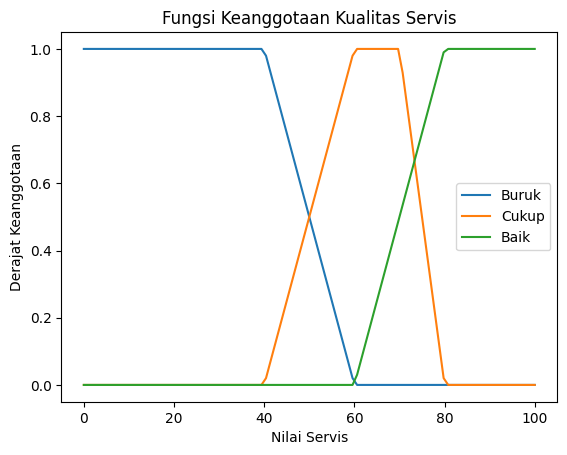

In [ ]:
x_servis = np.linspace(0, 100, 100)

plt.figure()
plt.plot(x_servis, [servis_buruk(x) for x in x_servis], label='Buruk')
plt.plot(x_servis, [servis_cukup(x) for x in x_servis], label='Cukup')
plt.plot(x_servis, [servis_baik(x) for x in x_servis], label='Baik')
plt.title('Fungsi Keanggotaan Kualitas Servis')
plt.xlabel('Nilai Servis')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.show()


### Visualisasi Harga

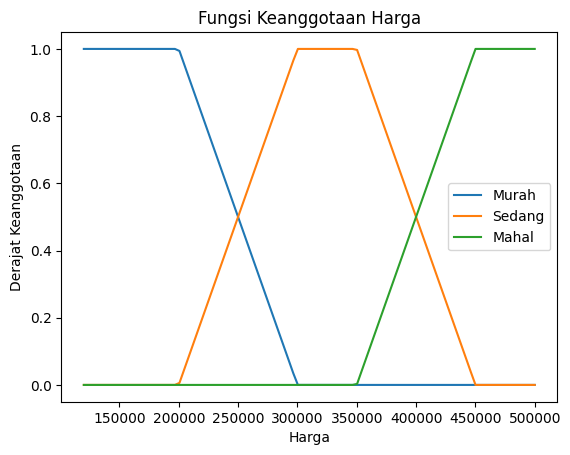

In [ ]:
x_harga = np.linspace(120000, 500000, 100)

plt.figure()
plt.plot(x_harga, [harga_murah(x) for x in x_harga], label='Murah')
plt.plot(x_harga, [harga_sedang(x) for x in x_harga], label='Sedang')
plt.plot(x_harga, [harga_mahal(x) for x in x_harga], label='Mahal')
plt.title('Fungsi Keanggotaan Harga')
plt.xlabel('Harga')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.show()


## Aturan Fuzzy

1. Jika Servis Buruk → Tidak Layak  
2. Jika Servis Cukup dan Harga Murah → Layak  
3. Jika Servis Baik dan Harga Murah → Sangat Layak  
4. Jika Servis Baik dan Harga Mahal → Layak  


## Inferensi + Defuzzifikasi

In [ ]:
def hitung_kelayakan(servis, harga):
    sb = servis_buruk(servis)
    sc = servis_cukup(servis)
    sk = servis_baik(servis)

    hm = harga_murah(harga)
    hs = harga_sedang(harga)
    hh = harga_mahal(harga)

    tidak_layak = max(sb, min(sc, hh))
    layak = max(min(sc, hm), min(sk, hh))
    sangat_layak = min(sk, hm)

    skor = (
        tidak_layak * 30 +
        layak * 60 +
        sangat_layak * 90
    ) / (tidak_layak + layak + sangat_layak + 0.0001)

    return skor


## Hitung Skor Kelayakan

In [ ]:
df['skor_kelayakan'] = df.apply(
    lambda r: hitung_kelayakan(r['kualitas_servis'], r['harga']),
    axis=1
)
df.head()


,id_bengkel,kualitas_servis,harga,skor_kelayakan
0,B01,45,330000,29.996001
1,B02,60,410000,29.995001
2,B03,79,470000,57.137415
3,B04,94,450000,59.994001
4,B05,77,370000,44.988753


## Kategori Rekomendasi Bengkel


In [ ]:
def kategori_rekomendasi(skor):
    if skor < 40:
        return "Sangat Tidak Direkomendasikan"
    elif skor <= 70:
        return "Direkomendasikan"
    else:
        return "Sangat Direkomendasikan"

df['rekomendasi'] = df['skor_kelayakan'].apply(kategori_rekomendasi)
df.head()


,id_bengkel,kualitas_servis,harga,skor_kelayakan,rekomendasi
0,B01,45,330000,29.996001,Sangat Tidak Direkomendasikan
1,B02,60,410000,29.995001,Sangat Tidak Direkomendasikan
2,B03,79,470000,57.137415,Direkomendasikan
3,B04,94,450000,59.994001,Direkomendasikan
4,B05,77,370000,44.988753,Direkomendasikan


## Distribusi Rekomendasi Bengkel


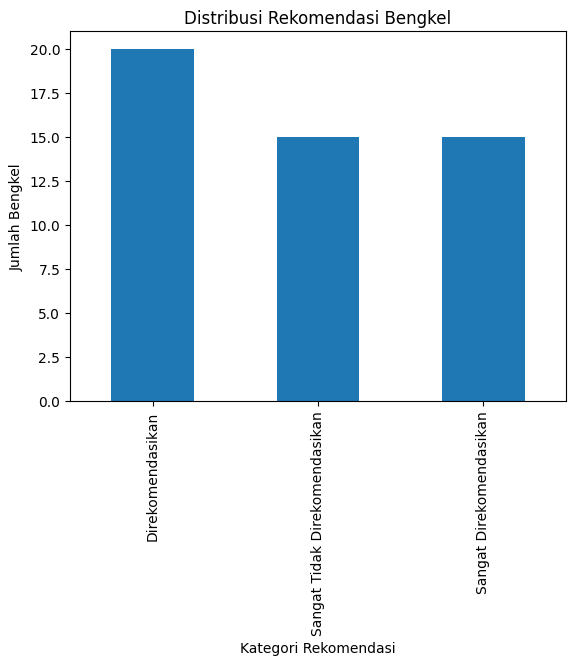

In [ ]:
df['rekomendasi'].value_counts().plot(kind='bar')
plt.title('Distribusi Rekomendasi Bengkel')
plt.xlabel('Kategori Rekomendasi')
plt.ylabel('Jumlah Bengkel')
plt.show()


## Lima Bengkel Terbaik


In [ ]:
top5 = df.sort_values(by='skor_kelayakan', ascending=False).head(5)
top5


,id_bengkel,kualitas_servis,harga,skor_kelayakan,rekomendasi
48,B49,94,170000,89.991001,Sangat Direkomendasikan
42,B43,89,120000,89.991001,Sangat Direkomendasikan
36,B37,93,200000,89.991001,Sangat Direkomendasikan
14,B15,93,220000,89.988751,Sangat Direkomendasikan
31,B32,82,240000,89.985002,Sangat Direkomendasikan


## Analisis Hasil

Bengkel dengan skor kelayakan tinggi umumnya memiliki
kualitas servis yang baik dengan harga yang masih tergolong
murah atau sedang. Sistem fuzzy lebih memprioritaskan
kualitas servis dibandingkan harga.

## Kesimpulan

Metode Fuzzy Logic Mamdani berhasil digunakan
untuk menentukan rekomendasi bengkel terbaik.
Output sistem berupa skor kelayakan dan kategori
rekomendasi yang mudah dipahami oleh pengguna.
